Vector{Float64}

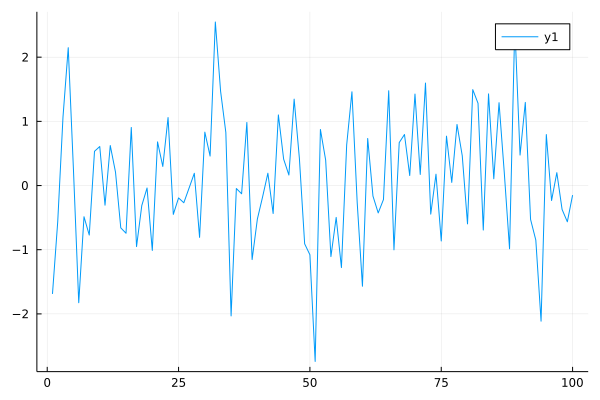

In [3]:
using Plots
using Statistics

n=100
ϵ=randn(n)
print(typeof(ϵ))
plot(1:n,ϵ)

In [13]:
n=100
ϵ=zeros(n)
for i in eachindex(ϵ)
    ϵ[i]=randn()
end
mean(ϵ)

-0.08998234763541019

In [16]:
for i in ϵ[1:10]
    println(i)
end


-2.496912050083782
-0.6729581584956931
1.2942259724402083
0.4840629089232762
-0.01368157668050524
0.13474871412994316
1.3469910939011778
0.5448366046097612
-1.5132368952491766
0.2953708682803883


In [17]:
function generatedata(n)
    ϵ=randn(n)
    return ϵ.^2
end

generatedata (generic function with 1 method)

In [20]:
generatedata(3)

3-element Vector{Float64}:
 0.00304765505506754
 1.0340168206052107
 1.905868313026768

In [24]:
generatedata(n)=randn(n).^2
generatedata(10)

10-element Vector{Float64}:
 0.1725817791029103
 0.008743508652729338
 0.1651832115045903
 3.079789081130321
 0.16543118580541108
 0.10962800531243208
 0.9114317012771805
 0.14239883833470746
 0.0013440061991607424
 0.042579055910748405

In [29]:
f(n)=n^2
println(f(10))
generatedata(n)=f.(randn(10))
println(generatedata(10))

100
[0.0998612468716319, 0.5900196017789131, 0.3482909411268408, 0.3019194448608766, 3.685610814636919, 0.4207024167790867, 0.01667977838494918, 1.0883627021507107, 0.32721458888078, 0.6284629934574514]


In [32]:
generatedata(n,fun)=fun.(randn(n))
f(n)=n^2
generatedata(10,f)

10-element Vector{Float64}:
 0.3928955335806934
 2.4833004018757774
 0.3335325656315935
 2.266791410146654
 0.7574773409399657
 0.3526246085250499
 0.15446491326586165
 1.4079673148491805
 0.3056691161550082
 0.24789306401027844

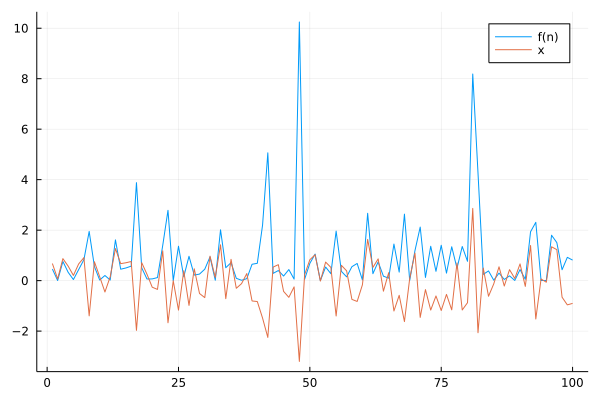

In [34]:
n=100
f(n)=n^2
x=randn(n)
plot(f.(x),label="f(n)")
plot!(x,label="x")

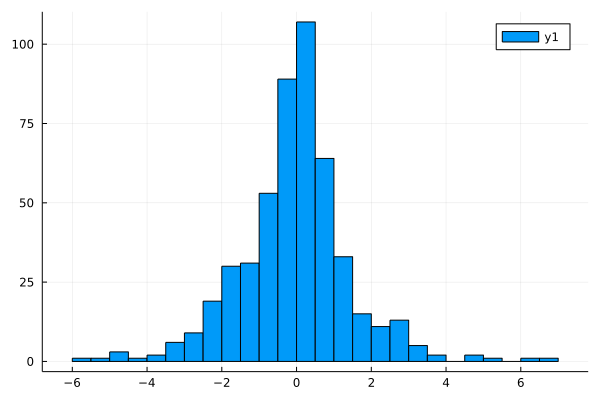

In [40]:
using Distributions
function plothistogram(distribution,n)
    ϵ=rand(distribution,n)
    histogram(ϵ)
end

lp=Laplace()
plothistogram(lp,500)

In [43]:
using LinearAlgebra
p=1.0
β=0.9
maxiter=1000
tolerance=1e-7
v_iv=0.8
v_old=v_iv
normdiff=Inf
iter=1
while normdiff>tolerance && iter<=maxiter
    v_new=p+β*v_old
    norm_diff=norm(v_new-v_old)
    iter+=1
end
println("fixed point =$v_old and |f(x)-x|=$normdiff in $iter iterations")

fixed point =0.8 and |f(x)-x|=Inf in 1001 iterations


In [44]:
v_old=v_iv
normdiff=Inf
iter=1
for i in 1:maxiter
    v_new=p+β*(v_old)
    normdiff=norm(v_new-v_old)
    if normdiff<tolerance
        iter=i
        break
    end
    v_old=v_new
end
println("fixed point =$v_old and |f(x)-x|=$normdiff in $iter iterations")






fixed point =9.999999081896231 and |f(x)-x|=9.181037796679448e-8 in 154 iterations


(value = 9.999999918629035, normdiff = 9.041219328764782e-9, iter = 177)
10 0.526315794028558
20 0.5555555598745151
30 0.5882352979261614
40 0.6249999969916261
50 0.6666666686534881
60 0.714285711929618
70 0.769230770702452
80 0.8333333340160001
90 0.9090909092
100 1.0
110 1.1111111108
120 1.2499999981568
130 1.4285714258656348
140 1.6666666628550266
150 1.9999999910593034
160 2.4999999894792877
170 3.333333311008387
180 4.999999962005721
190 9.999999918629046


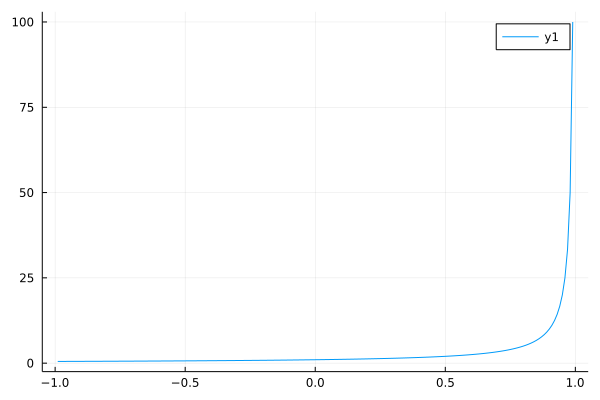

In [5]:
using LinearAlgebra

function fixedpointmap(f;iv,tolerance=1E-7,maxiter=1000)
    x_old=iv
    normdiff=Inf
    iter=1
    while normdiff>tolerance && iter<=maxiter
        x_new=f(x_old)
        normdiff=norm(x_new-x_old)
        x_old=x_new
        iter+=1
    end
    return (value=x_old,normdiff=normdiff,iter=iter)
end
p=1
β=0.9
f(v)=p+β*v
println(fixedpointmap(f,iv=0.8,tolerance=1.0E-8))

params=[-1+i*0.01 for i in 1:199]
result=zeros(199)
for i in eachindex(params)
    f(v)=p+params[i]*v
    result[i]=fixedpointmap(f,iv=0.8,tolerance=1.0E-8).value
    if i%10 ==0
        println(i," ",result[i])
    end
end
plot(params,result)

In [9]:
using NLsolve

p=1.0
β=0.9
iv=[0.8]
sol=fixedpoint(v->p .+ β*v,iv)
#println("fixed point=$(sol.zero) and |f(x)-x|=$(norm(f(sol.zero)-sol.zero)) in $(sol.iterations) iteratioons")

Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=1 beta=1 aa_start=1 droptol=0
 * Starting Point: [0.8]
 * Zero: [9.999999999999972]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 3
 * Jacobian Calls (df/dx): 0

In [2]:
function my_factorial(n)
    if n<0
            error("n must be positive integer")
    end
    result=1
    for i in 1:n
        result*=i
    end
    return result
end

#manual
function recursive_factorial(n)
    if n<0
        error(" n must be posive integer")
    end
    if n==1
        return 1
    end
    result=recursive_factorial(n-1)
    println(result)
    return result*n
    
end
#https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/
recursive_factorial(99)


1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
6227020800
87178291200
1307674368000
20922789888000
355687428096000
6402373705728000
121645100408832000
2432902008176640000
-4249290049419214848
-1250660718674968576
8128291617894825984
-7835185981329244160
7034535277573963776
-1569523520172457984
-5483646897237262336
-5968160532966932480
-7055958792655077376
-8764578968847253504
4999213071378415616
-6045878379276664832
3400198294675128320
4926277576697053184
6399018521010896896
9003737871877668864
1096907932701818880
4789013295250014208
2304077777655037952
-70609262346240000
-2894979756195840000
7538058755741581312
-7904866829883932672
2673996885588443136
-8797348664486920192
1150331055211806720
-1274672626173739008
-5844053835210817536
8789267254022766592
-3258495067890909184
-162551799050403840
-8452693550620999680
-5270900413883744256
-7927461244078915584
6711489344688881664
6908521828386340864
6404118670120845312
2504001392817995776
162129586585337856
-87189688785892802

0

In [1]:
function montecarlo_π(n=1000)
    count=0
    for i in 1:n
        x,y=rand(),rand()
        if (x-0.5)^2+(y-0.5)^2<1/4
           count+=1
        end
    end
    return count/n*4
end


    

montecarlo_π (generic function with 2 methods)

In [3]:
montecarlo_π()

3.128

In [4]:
tmp=10
for i in 1:5
    println(tmp,":",montecarlo_π(tmp))
    tmp*=10
    
end



10:3.6
100:3.28
1000:3.108
10000:3.1636
100000:3.14432


In [18]:
using Statistics
result=[]
for i in 1:10000
    push!(result,montecarlo_π())
end
println(mean(result))
println(var(result))

3.142129999999998
0.0026970400040004015


In [14]:
a=[1 2 3]
mean(a)
var(a)
st(a)

LoadError: UndefVarError: st not defined